In [80]:
import pandas as pd 
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [76]:
df_client = pd.read_csv('./data/predict-energy-behavior-of-prosumers/client.csv')
df_train = pd.read_csv('./data/predict-energy-behavior-of-prosumers/train.csv')
df_gas_prices = pd.read_csv('./data/predict-energy-behavior-of-prosumers/gas_prices.csv')
df_electricity = pd.read_csv('./data/predict-energy-behavior-of-prosumers/electricity_prices.csv')
df_forecast_weather = pd.read_csv('./data/predict-energy-behavior-of-prosumers/forecast_weather.csv')
df_historical_weather = pd.read_csv('./data/predict-energy-behavior-of-prosumers/historical_weather.csv')
df_weather_station = pd.read_csv('./data/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv')

In [73]:
print("Client Data Columns:")
print(df_client.columns)

print("\nTrain Data Columns:")
print(df_train.columns)

print("\nGas Prices Data Columns:")
print(df_gas_prices.columns)

print("\nElectricity Prices Data Columns:")
print(df_electricity.columns)

print("\nForecast Weather Data Columns:")
print(df_forecast_weather.columns)

print("\nHistorical Weather Data Columns:")
print(df_historical_weather.columns)

print("\nWeather Station Data Columns:")
print(df_weather_station.columns)


Client Data Columns:
Index(['product_type', 'county', 'eic_count', 'installed_capacity',
       'is_business', 'date', 'data_block_id'],
      dtype='object')

Train Data Columns:
Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')

Gas Prices Data Columns:
Index(['forecast_date', 'lowest_price_per_mwh', 'highest_price_per_mwh',
       'origin_date', 'data_block_id'],
      dtype='object')

Electricity Prices Data Columns:
Index(['forecast_date', 'euros_per_mwh', 'origin_date', 'data_block_id'], dtype='object')

Forecast Weather Data Columns:
Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_rad

In [58]:
# Afficher le nombre de valeurs manquantes avec une barre
print("Client Data:")
print(df_client.isnull().sum(), end='\n\n')

print("Train Data:")
print(df_train.isnull().sum(), end='\n\n')

print("Gas Prices Data:")
print(df_gas_prices.isnull().sum(), end='\n\n')

print("Electricity Prices Data:")
print(df_electricity.isnull().sum(), end='\n\n')

print("Forecast Weather Data:")
print(df_forecast_weather.isnull().sum(), end='\n\n')

print("Historical Weather Data:")
print(df_historical_weather.isnull().sum(), end='\n\n')

print("Weather Station Data:")
print(df_weather_station.isnull().sum(), end='\n\n')




Client Data:
product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64

Train Data:
county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

Gas Prices Data:
forecast_date            0
lowest_price_per_mwh     0
highest_price_per_mwh    0
origin_date              0
data_block_id            0
dtype: int64

Electricity Prices Data:
forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

Forecast Weather Data:
latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudco

In [59]:
# Afficher le nombre de valeurs uniques avec une barre
print("Client Data:")
print(df_client.nunique(), end='\n\n')

print("Train Data:")
print(df_train.nunique(), end='\n\n')

print("Gas Prices Data:")
print(df_gas_prices.nunique(), end='\n\n')

print("Electricity Prices Data:")
print(df_electricity.nunique(), end='\n\n')

print("Forecast Weather Data:")
print(df_forecast_weather.nunique(), end='\n\n')

print("Historical Weather Data:")
print(df_historical_weather.nunique(), end='\n\n')

print("Weather Station Data:")
print(df_weather_station.nunique(), end='\n\n')


Client Data:
product_type             4
county                  16
eic_count              484
installed_capacity    1952
is_business              2
date                   636
data_block_id          636
dtype: int64

Train Data:
county                     16
is_business                 2
product_type                4
target                 565566
is_consumption              2
datetime                15312
data_block_id             638
row_id                2018352
prediction_unit_id         69
dtype: int64

Gas Prices Data:
forecast_date            637
lowest_price_per_mwh     414
highest_price_per_mwh    456
origin_date              637
data_block_id            637
dtype: int64

Electricity Prices Data:
forecast_date    15286
euros_per_mwh    11025
origin_date      15286
data_block_id      637
dtype: int64

Forecast Weather Data:
latitude                                   8
longitude                                 14
origin_datetime                          637
hours_ahead            

In [62]:
# Voir les county codes
with open('./data/predict-energy-behavior-of-prosumers/county_id_to_name_map.json') as f:
    county_codes = json.load(f)
pd.DataFrame(county_codes, index=[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,HARJUMAA,HIIUMAA,IDA-VIRUMAA,JÄRVAMAA,JÕGEVAMAA,LÄÄNE-VIRUMAA,LÄÄNEMAA,PÄRNUMAA,PÕLVAMAA,RAPLAMAA,SAAREMAA,TARTUMAA,UNKNOWN,VALGAMAA,VILJANDIMAA,VÕRUMAA


In [63]:
# Nombre de doublons pour chaque dataset
print("Client Data:")
print(df_client.duplicated().sum())

print("Train Data:")
print(df_train.duplicated().sum())

print("Gas Prices Data:")
print(df_gas_prices.duplicated().sum())

print("Electricity Prices Data:")
print(df_electricity.duplicated().sum())

print("Forecast Weather Data:")
print(df_forecast_weather.duplicated().sum())

print("Historical Weather Data:")
print(df_historical_weather.duplicated().sum())

print("Weather Station Data:")
print(df_weather_station.duplicated().sum())


Client Data:
0
Train Data:
0
Gas Prices Data:
0
Electricity Prices Data:
0
Forecast Weather Data:
0
Historical Weather Data:
0
Weather Station Data:
0


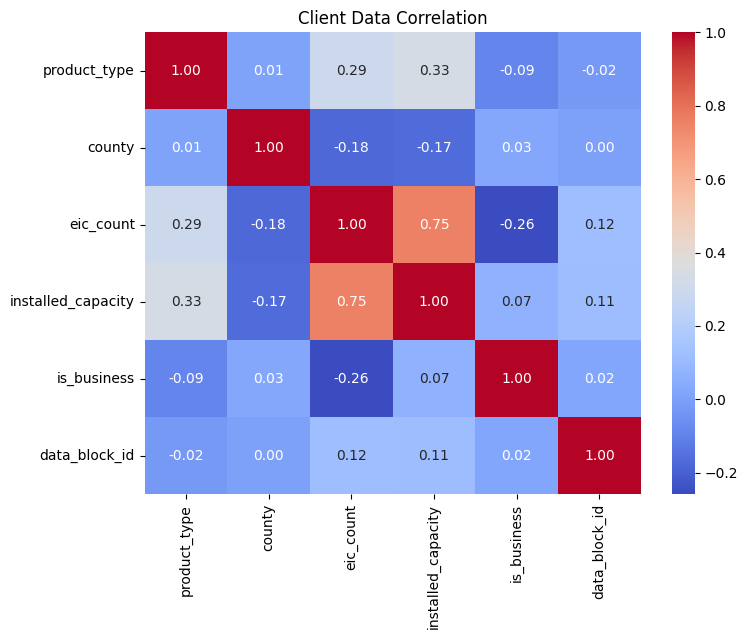

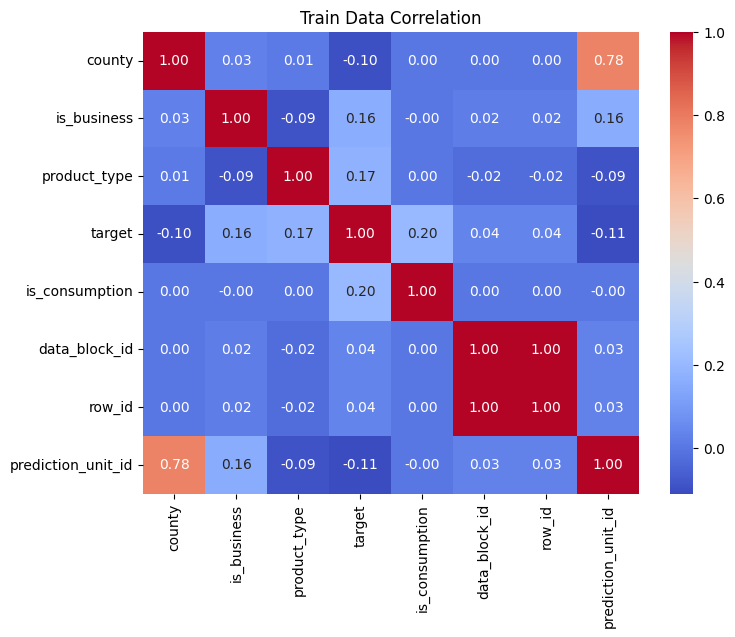

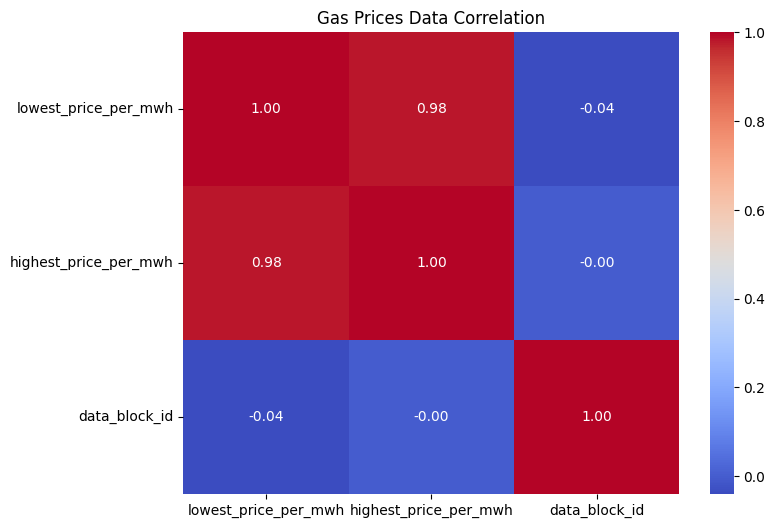

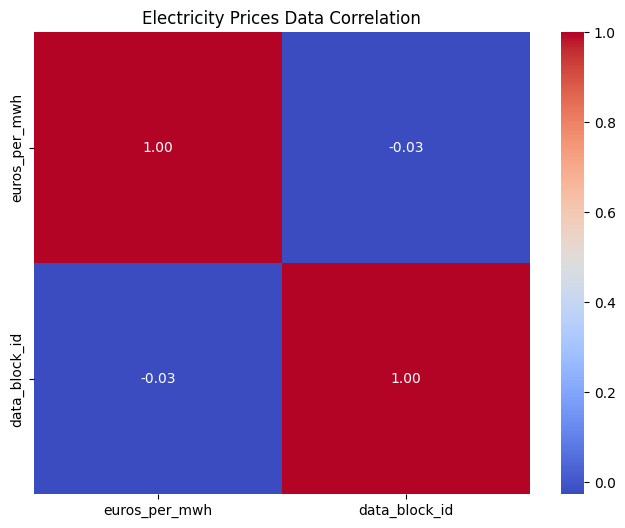

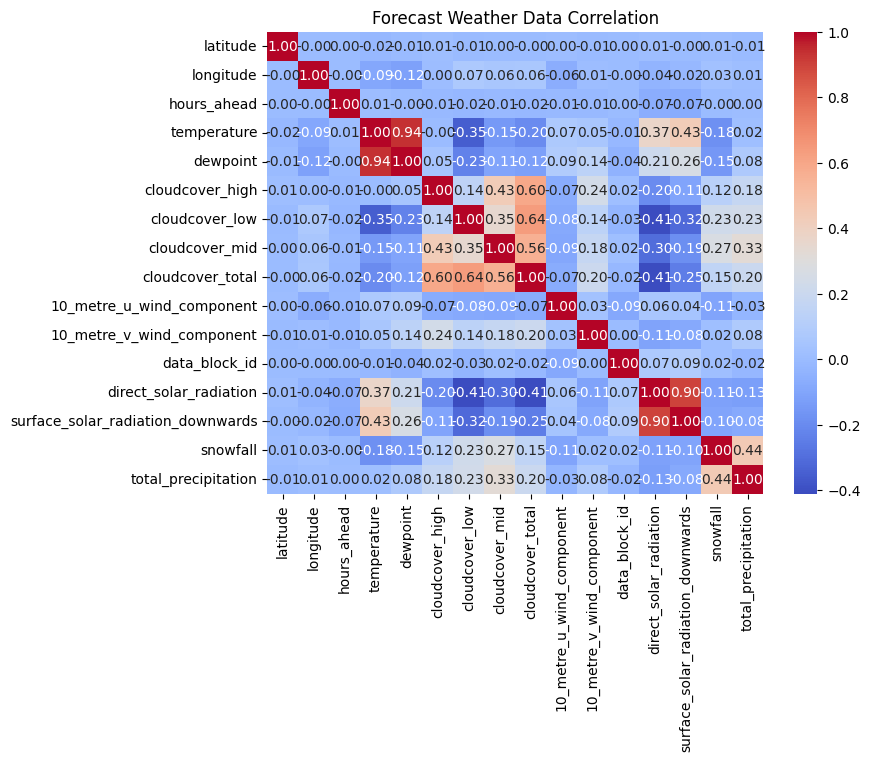

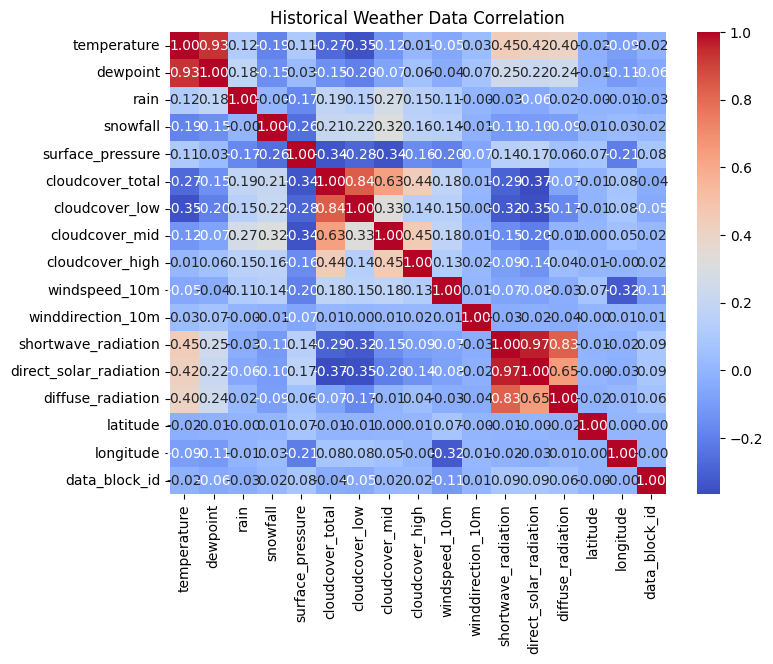

In [78]:
# Fonction pour exclure les colonnes non numériques
def plot_correlation_heatmap(df, title):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

# Utiliser la fonction pour chaque dataset
plot_correlation_heatmap(df_client, "Client Data Correlation")
plot_correlation_heatmap(df_train, "Train Data Correlation")
plot_correlation_heatmap(df_gas_prices, "Gas Prices Data Correlation")
plot_correlation_heatmap(df_electricity, "Electricity Prices Data Correlation")
plot_correlation_heatmap(df_forecast_weather, "Forecast Weather Data Correlation")
plot_correlation_heatmap(df_historical_weather, "Historical Weather Data Correlation")


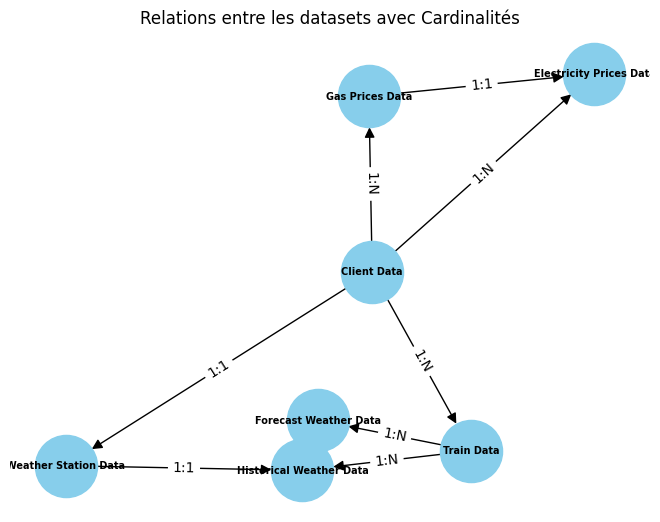

In [92]:
# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter des nœuds pour chaque DataFrame
G.add_node("Client Data")
G.add_node("Train Data")
G.add_node("Gas Prices Data")
G.add_node("Electricity Prices Data")
G.add_node("Forecast Weather Data")
G.add_node("Historical Weather Data")
G.add_node("Weather Station Data")

# Ajouter des arêtes avec des étiquettes pour montrer les relations entre les DataFrames
G.add_edges_from([("Client Data", "Train Data", {'label': '1:N'}),
                  ("Client Data", "Gas Prices Data", {'label': '1:N'}),
                  ("Client Data", "Electricity Prices Data", {'label': '1:N'}),
                  ("Client Data", "Weather Station Data", {'label': '1:1'}),
                  ("Train Data", "Forecast Weather Data", {'label': '1:N'}),
                  ("Train Data", "Historical Weather Data", {'label': '1:N'}),
                  ("Gas Prices Data", "Electricity Prices Data", {'label': '1:1'}),
                  ("Forecast Weather Data", "Historical Weather Data", {'label': '1:N'}),
                  ("Weather Station Data", "Historical Weather Data", {'label': '1:1'})])

# Dessiner le graphe avec les étiquettes
pos = nx.spring_layout(G, seed=41)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=7, font_color="black", font_weight="bold", arrowsize=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Afficher le graphe
plt.title("Relations entre les datasets avec Cardinalités")
plt.show()


In [100]:
def find_electricity_price(line):
    return df_electricity[df_electricity["origin_date"]== line["datetime"]].iloc[0]["euros_per_mwh"]

df_train["euros_per_mwh"] = df_train.apply(find_electricity_price, axis = 1)
df_train 

KeyboardInterrupt: 

In [101]:
import time

def find_electricity_price(line):
    if int(line.name) % 2000 == 0 : 
        print(line.name , "/" , df_train.) 
        (line.name, '/' , df_train.shape[0])*100, "%", end="\r")

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
def find_time(group):
    return df

In [102]:
df_train.sample(10000)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
1860677,0,0,1,206.976,1,2023-04-12 10:00:00,588,1860677,0
1416214,9,1,3,1.063,0,2022-11-24 10:00:00,449,1416214,37
1970249,0,1,2,22.167,1,2023-05-16 21:00:00,622,1970249,61
18270,11,1,1,0.000,0,2021-09-07 05:00:00,6,18270,46
1109526,3,0,3,1.492,0,2022-08-22 02:00:00,355,1109526,12
...,...,...,...,...,...,...,...,...,...
1312452,14,1,3,0.000,0,2022-10-23 23:00:00,417,1312452,56
92419,5,0,1,8.644,1,2021-10-02 12:00:00,31,92419,19
1426791,3,1,1,74.253,1,2022-11-27 15:00:00,452,1426791,13
519831,4,0,3,49.247,1,2022-02-19 00:00:00,171,519831,16
